In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)


In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 784),
            nn.Tanh()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, z):
        out = self.net(z)
        return out

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        out = self.net(x)
        return out

In [11]:
Gen = Generator().to(device)
Disc = Discriminator().to(device)

criterion = nn.BCELoss()

optim_g = optim.Adam(Gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
optim_d = optim.Adam(Disc.parameters(), lr=2e-4, betas=(0.5, 0.999))

fixed_noise = torch.randn(5, 100, device=device)


Epoch [1/20] Batch 0/469 Loss D: 1.3839, Loss G: 0.6933, D(x): 0.5012, D(G(z)): 0.4999
Epoch [1/20] Batch 200/469 Loss D: 0.6418, Loss G: 1.1127, D(x): 0.9355, D(G(z)): 0.3291
Epoch [1/20] Batch 400/469 Loss D: 0.3896, Loss G: 2.3285, D(x): 0.8736, D(G(z)): 0.1183


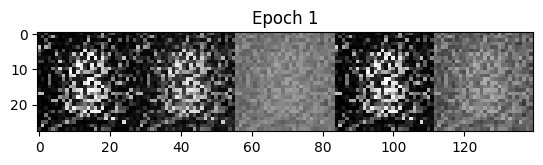

Epoch [2/20] Batch 0/469 Loss D: 0.1681, Loss G: 5.2558, D(x): 0.9544, D(G(z)): 0.0081
Epoch [2/20] Batch 200/469 Loss D: 0.4372, Loss G: 3.2810, D(x): 0.7362, D(G(z)): 0.0601
Epoch [2/20] Batch 400/469 Loss D: 0.2357, Loss G: 3.8994, D(x): 0.9184, D(G(z)): 0.0209


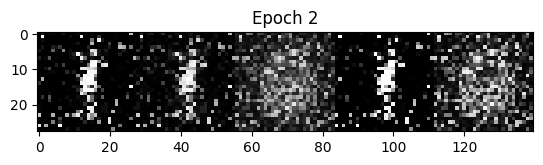

Epoch [3/20] Batch 0/469 Loss D: 0.2625, Loss G: 4.1603, D(x): 0.9284, D(G(z)): 0.0163
Epoch [3/20] Batch 200/469 Loss D: 0.2537, Loss G: 4.2115, D(x): 0.9156, D(G(z)): 0.0224
Epoch [3/20] Batch 400/469 Loss D: 0.1525, Loss G: 5.6158, D(x): 0.9923, D(G(z)): 0.0040


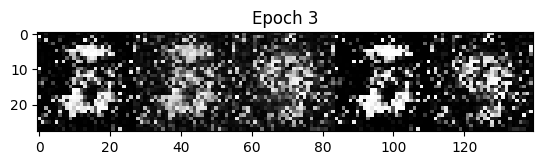

Epoch [4/20] Batch 0/469 Loss D: 0.2049, Loss G: 6.5056, D(x): 0.9512, D(G(z)): 0.0031
Epoch [4/20] Batch 200/469 Loss D: 0.4181, Loss G: 3.0773, D(x): 0.8644, D(G(z)): 0.0555
Epoch [4/20] Batch 400/469 Loss D: 0.5439, Loss G: 1.8770, D(x): 0.7300, D(G(z)): 0.1880


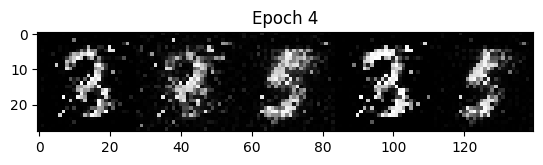

Epoch [5/20] Batch 0/469 Loss D: 0.5787, Loss G: 1.7241, D(x): 0.7180, D(G(z)): 0.2143
Epoch [5/20] Batch 200/469 Loss D: 0.4171, Loss G: 2.1127, D(x): 0.8457, D(G(z)): 0.1431
Epoch [5/20] Batch 400/469 Loss D: 0.5494, Loss G: 3.9332, D(x): 0.9177, D(G(z)): 0.0286


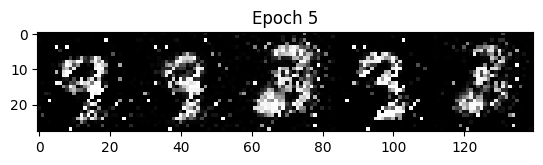

Epoch [6/20] Batch 0/469 Loss D: 0.4252, Loss G: 4.6374, D(x): 0.9426, D(G(z)): 0.0164
Epoch [6/20] Batch 200/469 Loss D: 0.4694, Loss G: 1.6654, D(x): 0.7922, D(G(z)): 0.2121
Epoch [6/20] Batch 400/469 Loss D: 0.3591, Loss G: 3.7997, D(x): 0.8105, D(G(z)): 0.0355


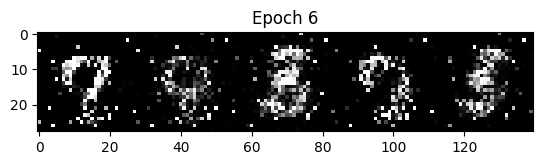

Epoch [7/20] Batch 0/469 Loss D: 0.3157, Loss G: 3.9186, D(x): 0.9109, D(G(z)): 0.0271
Epoch [7/20] Batch 200/469 Loss D: 0.4899, Loss G: 2.1088, D(x): 0.7709, D(G(z)): 0.1748
Epoch [7/20] Batch 400/469 Loss D: 0.3393, Loss G: 4.0675, D(x): 0.9396, D(G(z)): 0.0241


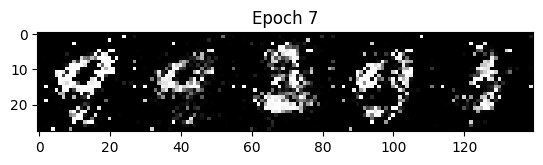

Epoch [8/20] Batch 0/469 Loss D: 0.2674, Loss G: 3.4670, D(x): 0.9130, D(G(z)): 0.0562
Epoch [8/20] Batch 200/469 Loss D: 0.5972, Loss G: 3.9710, D(x): 0.7526, D(G(z)): 0.0391
Epoch [8/20] Batch 400/469 Loss D: 0.3518, Loss G: 2.2675, D(x): 0.8431, D(G(z)): 0.1435


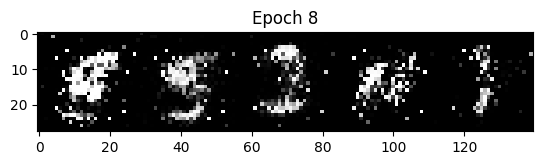

Epoch [9/20] Batch 0/469 Loss D: 0.7027, Loss G: 1.9681, D(x): 0.6821, D(G(z)): 0.1995
Epoch [9/20] Batch 200/469 Loss D: 0.3216, Loss G: 2.3773, D(x): 0.8759, D(G(z)): 0.1304
Epoch [9/20] Batch 400/469 Loss D: 0.5882, Loss G: 5.2744, D(x): 0.9884, D(G(z)): 0.0105


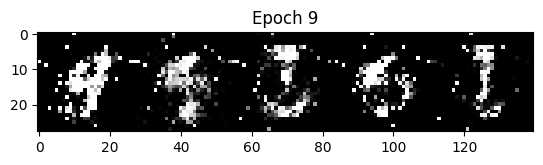

Epoch [10/20] Batch 0/469 Loss D: 0.4966, Loss G: 1.9639, D(x): 0.7697, D(G(z)): 0.2202
Epoch [10/20] Batch 200/469 Loss D: 0.8522, Loss G: 1.5908, D(x): 0.6382, D(G(z)): 0.2549
Epoch [10/20] Batch 400/469 Loss D: 0.4741, Loss G: 2.1612, D(x): 0.7579, D(G(z)): 0.1457


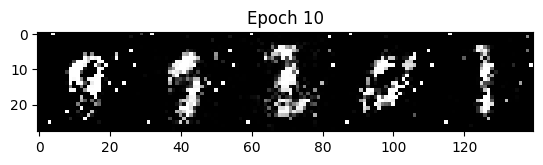

Epoch [11/20] Batch 0/469 Loss D: 0.3959, Loss G: 2.7878, D(x): 0.8780, D(G(z)): 0.0835
Epoch [11/20] Batch 200/469 Loss D: 0.2726, Loss G: 2.7954, D(x): 0.8714, D(G(z)): 0.0831
Epoch [11/20] Batch 400/469 Loss D: 0.4889, Loss G: 2.4140, D(x): 0.8031, D(G(z)): 0.1246


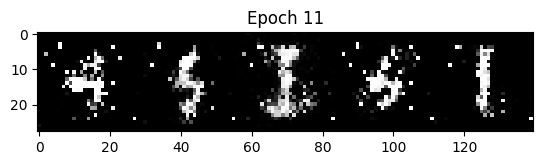

Epoch [12/20] Batch 0/469 Loss D: 0.4753, Loss G: 3.5065, D(x): 0.9187, D(G(z)): 0.0479
Epoch [12/20] Batch 200/469 Loss D: 0.5173, Loss G: 2.6141, D(x): 0.8436, D(G(z)): 0.1010
Epoch [12/20] Batch 400/469 Loss D: 0.7622, Loss G: 2.1675, D(x): 0.6708, D(G(z)): 0.1449


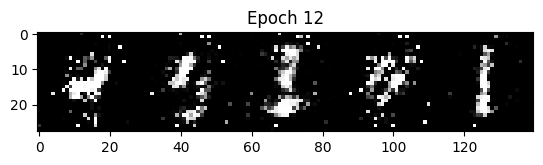

Epoch [13/20] Batch 0/469 Loss D: 0.4401, Loss G: 2.0833, D(x): 0.8200, D(G(z)): 0.1660
Epoch [13/20] Batch 200/469 Loss D: 0.6277, Loss G: 1.6315, D(x): 0.7046, D(G(z)): 0.2534
Epoch [13/20] Batch 400/469 Loss D: 0.5259, Loss G: 3.3975, D(x): 0.9018, D(G(z)): 0.0432


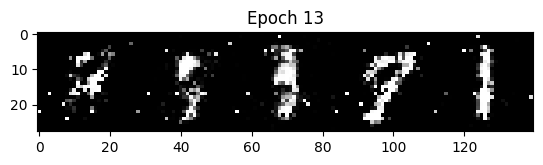

Epoch [14/20] Batch 0/469 Loss D: 0.3732, Loss G: 2.5090, D(x): 0.8705, D(G(z)): 0.1090
Epoch [14/20] Batch 200/469 Loss D: 0.4957, Loss G: 2.2685, D(x): 0.8134, D(G(z)): 0.1330
Epoch [14/20] Batch 400/469 Loss D: 0.6701, Loss G: 1.4536, D(x): 0.7108, D(G(z)): 0.2799


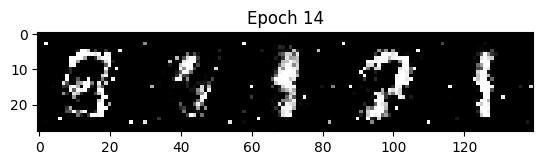

Epoch [15/20] Batch 0/469 Loss D: 1.5787, Loss G: 1.6527, D(x): 0.4877, D(G(z)): 0.2631
Epoch [15/20] Batch 200/469 Loss D: 0.4529, Loss G: 1.9514, D(x): 0.8105, D(G(z)): 0.1792
Epoch [15/20] Batch 400/469 Loss D: 0.4975, Loss G: 1.4946, D(x): 0.8354, D(G(z)): 0.2678


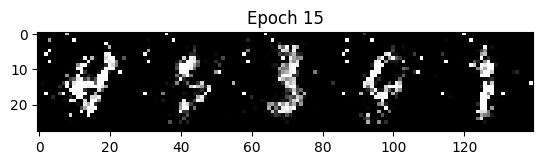

Epoch [16/20] Batch 0/469 Loss D: 0.4946, Loss G: 2.1011, D(x): 0.7690, D(G(z)): 0.1520
Epoch [16/20] Batch 200/469 Loss D: 0.7733, Loss G: 1.5440, D(x): 0.6981, D(G(z)): 0.2525
Epoch [16/20] Batch 400/469 Loss D: 1.0502, Loss G: 3.6560, D(x): 0.9223, D(G(z)): 0.0368


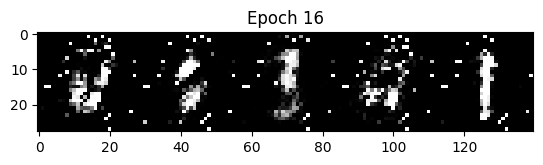

Epoch [17/20] Batch 0/469 Loss D: 0.4361, Loss G: 2.7749, D(x): 0.8876, D(G(z)): 0.0793
Epoch [17/20] Batch 200/469 Loss D: 0.6828, Loss G: 1.5841, D(x): 0.7046, D(G(z)): 0.2409
Epoch [17/20] Batch 400/469 Loss D: 0.5060, Loss G: 1.8308, D(x): 0.7758, D(G(z)): 0.1881


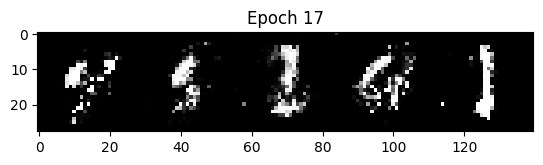

Epoch [18/20] Batch 0/469 Loss D: 0.9336, Loss G: 4.7793, D(x): 0.9053, D(G(z)): 0.0115
Epoch [18/20] Batch 200/469 Loss D: 0.7516, Loss G: 1.3284, D(x): 0.6767, D(G(z)): 0.3289
Epoch [18/20] Batch 400/469 Loss D: 0.8220, Loss G: 1.6538, D(x): 0.7370, D(G(z)): 0.2306


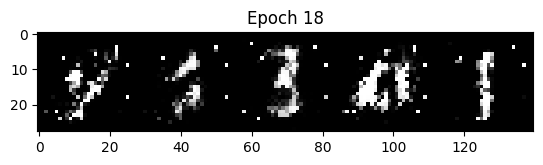

Epoch [19/20] Batch 0/469 Loss D: 0.6346, Loss G: 2.9743, D(x): 0.8244, D(G(z)): 0.0689
Epoch [19/20] Batch 200/469 Loss D: 0.5915, Loss G: 1.9490, D(x): 0.7154, D(G(z)): 0.1738
Epoch [19/20] Batch 400/469 Loss D: 0.6010, Loss G: 2.1652, D(x): 0.7943, D(G(z)): 0.1373


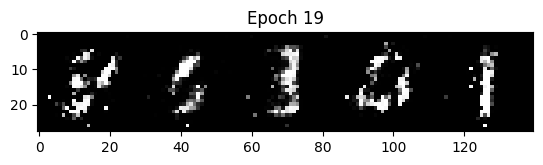

Epoch [20/20] Batch 0/469 Loss D: 0.6170, Loss G: 1.5304, D(x): 0.7437, D(G(z)): 0.2608
Epoch [20/20] Batch 200/469 Loss D: 0.7320, Loss G: 0.8946, D(x): 0.6627, D(G(z)): 0.4568
Epoch [20/20] Batch 400/469 Loss D: 0.9469, Loss G: 1.6440, D(x): 0.6565, D(G(z)): 0.2192


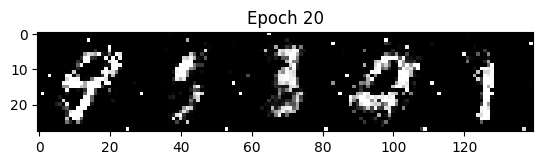

In [ ]:
epochs = 20
losses_G = [] # List of avg values per epoch
losses_D = [] 

for epoch in range(epochs):
    epoch_losses_G = []
    epoch_losses_D = []
    for batch_idx, (real_imgs, _) in enumerate(trainloader):
        real_imgs = real_imgs.view(-1, 784).to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size_curr, 1, device=device)
        fake_labels = torch.zeros(batch_size_curr, 1, device=device)

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)

        D_real = Disc(real_imgs)
        D_fake = Disc(fake_imgs.detach())

        loss_D_real = criterion(D_real, real_labels)
        loss_D_fake = criterion(D_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        optim_d.zero_grad()
        loss_D.backward()
        optim_d.step()

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)
        D_fake = Disc(fake_imgs)

        loss_G = criterion(D_fake, real_labels)

        optim_g.zero_grad()
        loss_G.backward()
        optim_g.step()

        if batch_idx % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {batch_idx}/{len(trainloader)} "
                  f"Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}, "
                  f"D(x): {D_real.mean().item():.4f}, D(G(z)): {D_fake.mean().item():.4f}")
        epoch_losses_D.append(loss_D.item())
        epoch_losses_G.append(loss_G.item())

    losses_D.append(np.mean(np.array(epoch_losses_D)))
    losses_G.append(np.mean(np.array(epoch_losses_G)))

    with torch.no_grad():
        fake_samples = Gen(fixed_noise).view(-1, 1, 28, 28)
        grid = torch.cat([fake_samples[i] for i in range(5)], dim=2)
        plt.imshow(grid.squeeze().cpu().numpy(), cmap="gray")
        plt.title(f"Epoch {epoch+1}")
        plt.show()

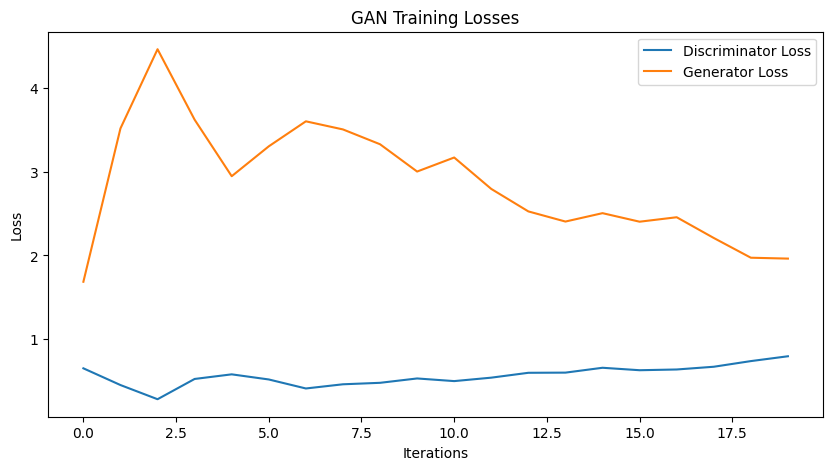

In [13]:
plt.figure(figsize=(10,5))
plt.plot(losses_D, label="Discriminator Loss")
plt.plot(losses_G, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Losses")
plt.legend()
plt.show()

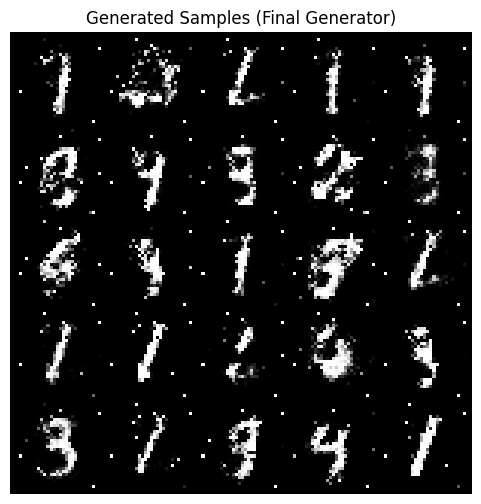

In [ ]:
import torchvision.utils as vutils

z = torch.randn(25, 100, device=device)
with torch.no_grad():
    fake_imgs = Gen(z).view(-1, 1, 28, 28)

grid = vutils.make_grid(fake_imgs, nrow=5, normalize=True, value_range=(-1, 1))

plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.axis("off")
plt.title("Generated Samples (Final Generator)")
plt.show()
